## Laboratorio 6


In [2]:
import os, cv2
import pandas as pd

Ahora procedmos a hacer una pequeña inspeccion de las familias que se encuentran en las imagenes: 

In [3]:


base_path = './data/'

family_id = 0
id = 0
columns = ['id', 'familyId', 'familyName', 'file', 'path', 'height', 'width']
temp_data = []
for folder in os.listdir(base_path):
  if ('.txt' in folder): continue

  count = 0
  full_path = base_path + folder + '/'
  for file in os.listdir(full_path):
    full_file_path = full_path + file
    img = cv2.imread(full_file_path, cv2.IMREAD_UNCHANGED)
    height, width = img.shape
    temp_data.append([id, family_id, folder, file, full_file_path, height, width])
    count += 1
    id += 1

  print(family_id, 'Family:', folder, '\t\tExamples', count)
  family_id += 1
data = pd.DataFrame(data=temp_data, columns=columns)



0 Family: Fakerean 		Examples 381
1 Family: Allaple.L 		Examples 1591
2 Family: Yuner.A 		Examples 800
3 Family: Dontovo.A 		Examples 162
4 Family: Agent.FYI 		Examples 116
5 Family: Wintrim.BX 		Examples 97
6 Family: VB.AT 		Examples 408
7 Family: Autorun.K 		Examples 106
8 Family: Skintrim.N 		Examples 80
9 Family: Lolyda.AA1 		Examples 213
10 Family: Lolyda.AA3 		Examples 123
11 Family: Dialplatform.B 		Examples 177
12 Family: Allaple.A 		Examples 2949
13 Family: C2LOP.P 		Examples 146
14 Family: Swizzor.gen!E 		Examples 128
15 Family: Obfuscator.AD 		Examples 142
16 Family: Instantaccess 		Examples 431
17 Family: Swizzor.gen!I 		Examples 132
18 Family: Adialer.C 		Examples 122
19 Family: Lolyda.AT 		Examples 159
20 Family: Malex.gen!J 		Examples 136
21 Family: Alueron.gen!J 		Examples 198
22 Family: Lolyda.AA2 		Examples 184
23 Family: C2LOP.gen!g 		Examples 200
24 Family: Rbot!gen 		Examples 158


Vemos que se encontraron 24 tipos de familias y cada familia con una cantidad diferentes de ejemplares y como se puede ver, hay algunas familias que cuentan con dos veces mas el promedio de las demas, pero si no se encuentran valores que sean muy bajos, por lo que no seria pertinente quitarlos. 

Entonces, ahora se creara el csv con el que se estara trabajando: 


In [9]:
df = pd.DataFrame(data=temp_data, columns=columns)
df.to_csv('./data.csv', index=False, encoding='utf8')

Con esto ya podemos trabajar sobre el csv final.

In [10]:
import pandas as pd
import numpy as np
import cv2


In [11]:
data = pd.read_csv('./data.csv', encoding='utf8')
data.describe()

,id,familyId,height,width
count,9339.000000,9339.000000,9339.000000,9339.000000
mean,4669.000000,9.469215,436.814541,334.171967
std,2696.081416,6.773829,203.640501,218.421689
min,0.000000,0.000000,208.000000,64.000000
25%,2334.500000,2.000000,281.000000,128.000000
50%,4669.000000,12.000000,424.000000,256.000000
75%,7003.500000,12.000000,467.000000,512.000000
max,9338.000000,24.000000,5334.000000,1024.000000


Podemos ahora empezar a mostrar cierta parte de las imagenes que se enceutran en el csv:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

KeyError: 'image'

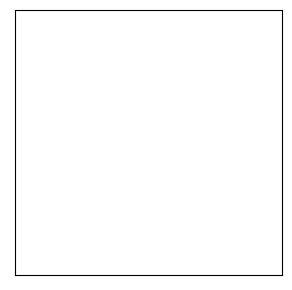

In [13]:
to_show = data.sample(20)

fig_size = (20, 20)
fig = plt.figure(figsize=fig_size)

id = 0
for index, row in to_show.iterrows():
  plt.subplot(5, 5, id + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(row['image'].astype(np.uint8))
  plt.xlabel(row['familyName'])
  id += 1

plt.show()